In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## **Exercise: Imbalance Classification**

**Gunakan dataset 'stroke.csv'**

Carilah model dan hyperparameter terbaik untuk memprediksi apakah seorang pasien menderita stroke.

1. Lakukan EDA untuk memahami dataset.
1. Lakukan preprocessing pada features jika dibutuhkan.
1. Lakukan modeling dengan menggunakan logistic regression, knn, dan decision tree.<br>
    Kandidat algoritma:
    - logreg = LogisticRegression(solver='liblinear', random_state=0)
    - knn = KNeighborsClassifier(n_neighbors=5)
    - tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=0)
1. Pilih 1 model terbaik berdasarkan hasil cross validasi 3 model di atas. Tentukan model benchmark-nya dengan melakukan imbalanced data treatment (bisa menggunakan SMOTE atau yang lainnya).
1. Lakukan hyperparameter tuning pada model terpilih tsb.
1. Lakukan prediksi pada test set dari model benchmark (sebelum hyperparameter tuning).
1. Lakukan prediksi pada test set dari model dengan hyperparameter tuning.
1. Bandingkan hasil performa model sebelum dan sesudah tuning.

## **Feature Information**

- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
-smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
- stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient


- FP
 (FP) terjadi ketika ML memprediksi seseorang menderita stroke, padahal sebenarnya orang tersebut tidak memiliki stroke 

 - FN
 false negative (FN) terjadi ketika ML memprediksi seseorang tidak menderita stroke, padahal sebenarnya orang tersebut sebenarnya memiliki stroke 

Dalam kasus ini seharusnya kita menekan FN, karena kesalahan dalam mendeteksi stroke dapat berpotensi mengancam jiwa dan dapat memiliki konsekuensi jangka panjang yang serius bagi pasie, untuk itu kita akan menggunalan  metrics recall

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(5110, 12)

In [8]:
num = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'age']

In [9]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [303]:
df.drop(index=df[df['gender'] == 'Other'].index, inplace=True)

In [11]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

## **2.EDA**

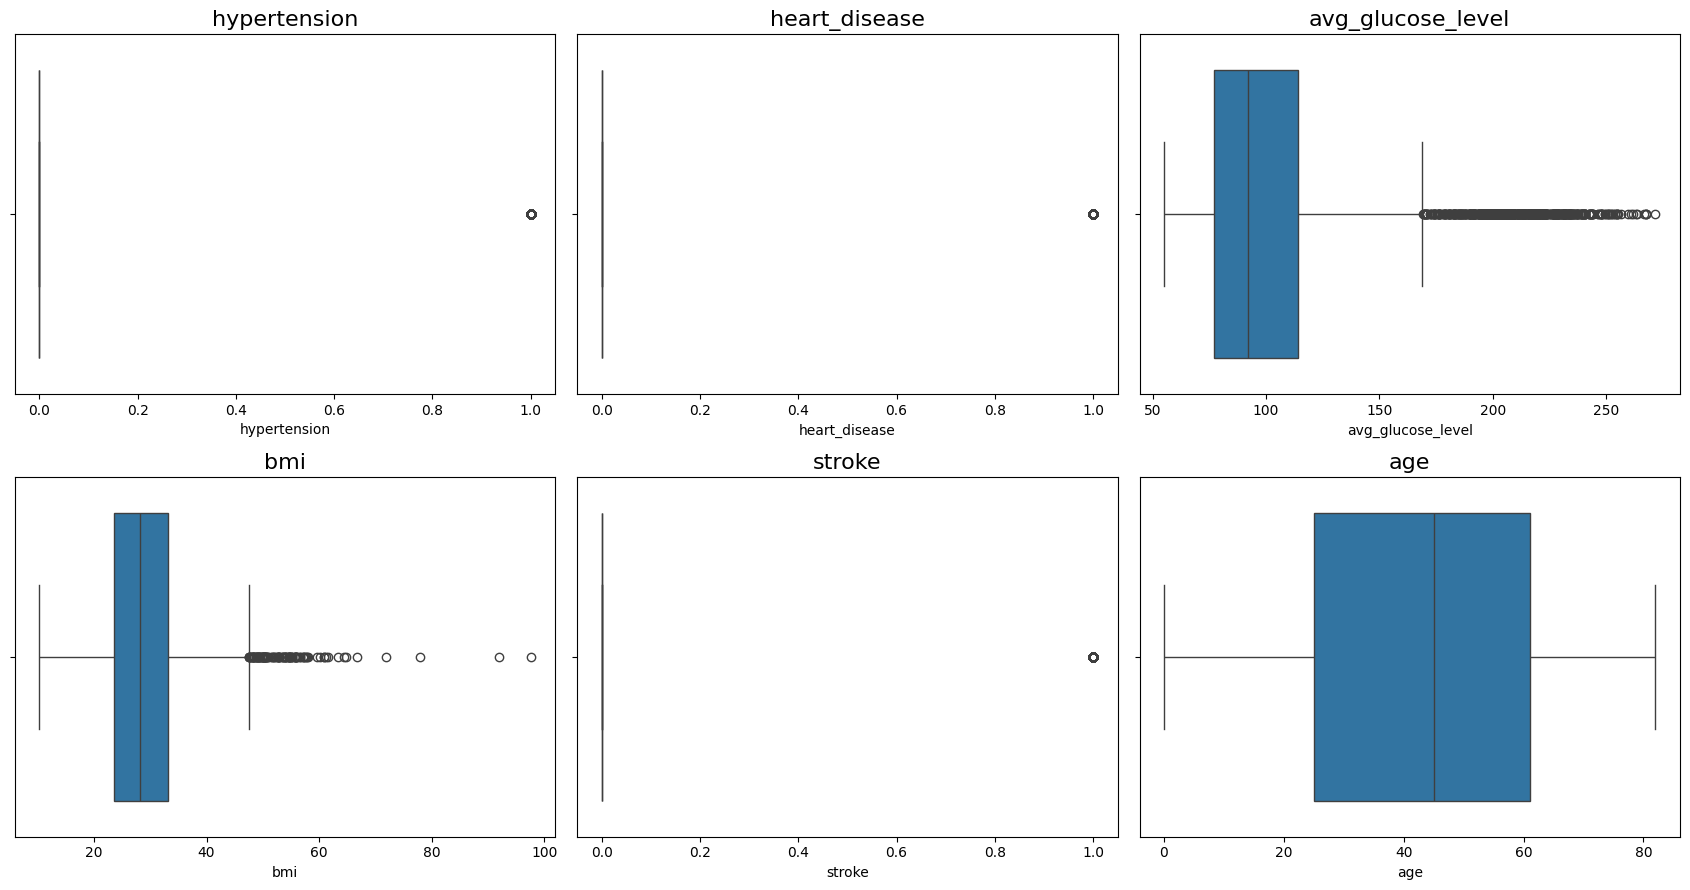

In [304]:
plt.figure(figsize=(17,9))
plotnumber = 1

for feature in num:
    ax = plt.subplot(2,3, plotnumber)
    sns.boxplot(x=feature, data=df)
    plt.title(feature, fontsize= 16)
    plt.tight_layout()
    plotnumber += 1

plt.show();

In [305]:
df.drop(index=df[df['avg_glucose_level'] > 250].index, inplace=True)
df.drop(index=df[df['bmi'] > 80].index, inplace=True)

In [306]:
df.shape

(5082, 12)

<Axes: xlabel='smoking_status', ylabel='stroke'>

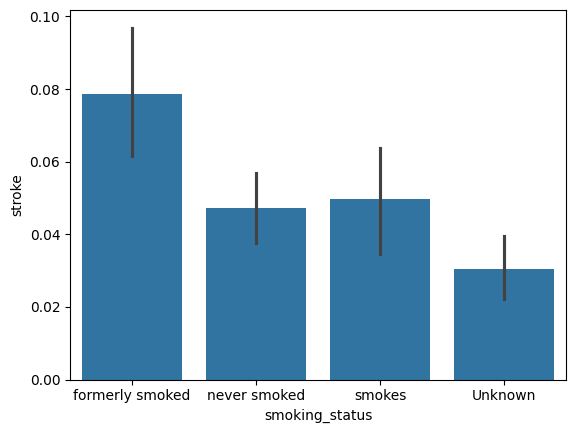

In [341]:
sns.barplot(data=df, x='smoking_status', y='stroke')

<Axes: xlabel='gender', ylabel='stroke'>

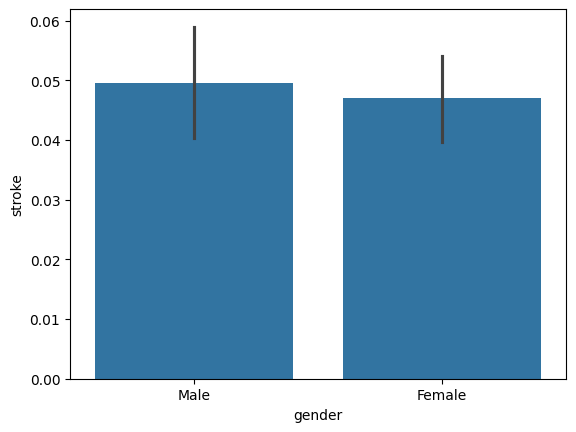

In [342]:
sns.barplot(data=df, x='gender', y='stroke')

## **3.Define X dan Y**

In [307]:
x = df.drop(columns=['id', 'stroke'])
y = df['stroke']

## **4.Train Test split**

In [308]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

## **5. Preprocessing**

1. Iterative Imputer
- simple imputer = bmi

2. Encoding
- One Hot Encoding = 'gender', 'ever_married', 'Residence_type' 
- binary = 'work_type', 'smoking status'

3. Scaling
- Robust scaler = 'age', 'avg_glucose_level', 'bmi'

In [309]:
x['gender'].value_counts()

gender
Female    2979
Male      2103
Name: count, dtype: int64

In [310]:
# 

pipe_iter_simple = Pipeline([
    ('simple', SimpleImputer(strategy='median')),  # Define langkah imputer
    ('robust', RobustScaler())  # Define langkah scaler
])

pipe_binary = Pipeline([
    ('simple', SimpleImputer(strategy='constant', fill_value='smokes')),  # Define langkah imputer
    ('binary', BinaryEncoder())  # Define langkah encoder
])

In [311]:

transformer = ColumnTransformer([
    ('pipe_iter_simple', pipe_iter_simple, ['age', 'avg_glucose_level', 'bmi']),
    ('pipe_binary', pipe_binary, ['smoking_status']),
    ('onehot', OneHotEncoder(drop='first'), ['gender', 'ever_married', 'Residence_type']),
    ('binary', BinaryEncoder(), ['work_type']),
], remainder='passthrough')


# transformer = ColumnTransformer([
#     ('pipe_iter_simple', pipe_iter_simple, ['age', 'avg_glucose_level', 'bmi']),
#     ('pipe_binary', pipe_binary, ['smoking_status']),
#     ('onehot_gender', OneHotEncoder(), ['gender']),  # One-hot encode the 'gender' column
#     ('onehot', OneHotEncoder(drop='first'), ['ever_married', 'Residence_type']),
#     ('binary', BinaryEncoder(), ['work_type']),
# ], remainder='passthrough')


transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iter_simple',
                                 Pipeline(steps=[('simple',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust', RobustScaler())]),
                                 ['age', 'avg_glucose_level', 'bmi']),
                                ('pipe_binary',
                                 Pipeline(steps=[('simple',
                                                  SimpleImputer(fill_value='smokes',
                                                                strategy='constant')),
                                                 ('binary', BinaryEncoder())]),
                                 ['smoking_status']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['gender', 'ever_married', 'Residence_type']),
                                ('binary', BinaryEncoder(), ['work_type'])])

In [312]:
transformer.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iter_simple',
                                 Pipeline(steps=[('simple',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust', RobustScaler())]),
                                 ['age', 'avg_glucose_level', 'bmi']),
                                ('pipe_binary',
                                 Pipeline(steps=[('simple',
                                                  SimpleImputer(fill_value='smokes',
                                                                strategy='constant')),
                                                 ('binary', BinaryEncoder())]),
                                 ['smoking_status']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['gender', 'ever_married', 'Residence_type']),
                                ('binary', BinaryEncoder(), ['work_type'])])

In [313]:
list_item = []
for col in x.columns:
    list_item.append([col,x[col].nunique(),x[col].unique()])

tabel_desc = pd.DataFrame(columns=['Nama Kolom','Jumlah Unique Value','Unique Values'],data=list_item)
tabel_desc

,Nama Kolom,Jumlah Unique Value,Unique Values
0,gender,2,"[Male, Female]"
1,age,104,"[67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69...."
2,hypertension,2,"[0, 1]"
3,heart_disease,2,"[1, 0]"
4,ever_married,2,"[Yes, No]"
5,work_type,5,"[Private, Self-employed, Govt_job, children, N..."
6,Residence_type,2,"[Urban, Rural]"
7,avg_glucose_level,3952,"[228.69, 202.21, 105.92, 171.23, 174.12, 186.2..."
8,bmi,416,"[36.6, nan, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8..."
9,smoking_status,4,"[formerly smoked, never smoked, smokes, Unknown]"


In [314]:
x.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  199
smoking_status         0
dtype: int64

## **5.Cross Validation**

In [315]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.pipeline import Pipeline

In [316]:
# define algo
logreg = LogisticRegression(solver='liblinear', random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=0)

In [317]:
list_algo = [logreg, knn, tree]
list_all_acc = []
list_mean_acc = []
list_std_acc = []

for algo in list_algo:
    # define model
    model = algo
    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    # cross validation 
    cross_val = cross_val_score(
        estimator= pipe_prep_model, # Model
        X= x_train,
        y= y_train,
        cv= 5,
        scoring='recall')
    # accuracy
    list_all_acc.append(cross_val.round(2))
    list_mean_acc.append(cross_val.mean())
    list_std_acc.append(cross_val.std())

In [318]:
df_recall = pd.DataFrame()
df_recall['algo'] = list_algo
df_recall['all_score'] = list_all_acc
df_recall['mean_score'] = list_mean_acc
df_recall['std_score'] = list_std_acc
df_recall

,algo,all_score,mean_score,std_score
0,"LogisticRegression(random_state=0, solver='lib...","[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000
1,KNeighborsClassifier(),"[0.0, 0.03, 0.0, 0.03, 0.0]",0.010256,0.012561
2,"DecisionTreeClassifier(criterion='entropy', ma...","[0.05, 0.03, 0.03, 0.0, 0.0]",0.020513,0.019188


## **6. Imabalance Treatment**
Kita akan membandingkan beberapa treatment berikut pada data yang imbalance
1. No treatment
2. SMOTE

In [319]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [326]:
# define model

model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=0)


# Create the pipeline
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# Fit the pipeline on the training data
pipe_prep_model.fit(x_train, y_train)

# Predict using the trained pipeline
y_pred_benchmark = pipe_prep_model.predict(x_test)

# f1 score
f1_benchmark = f1_score(y_test, y_pred_benchmark)
f1_benchmark

0.038461538461538464

In [321]:
from imblearn.under_sampling import RandomUnderSampler,NearMiss, CondensedNearestNeighbour
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.pipeline import Pipeline

In [330]:
smote = SMOTE(sampling_strategy='minority', random_state=0)
smote

SMOTE(random_state=0, sampling_strategy='minority')

Menggunakan SMOTE

In [327]:
# define model
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=0)

# pipeline
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('resampling', smote),
    ('modeling', model)
])

# fit
pipe_prep_model.fit(x_train, y_train)

# Predict
y_pred_smote = pipe_prep_model.predict(x_test)

# f1 score
recall_smote = recall_score(y_test, y_pred_smote)
recall_smote

0.6530612244897959

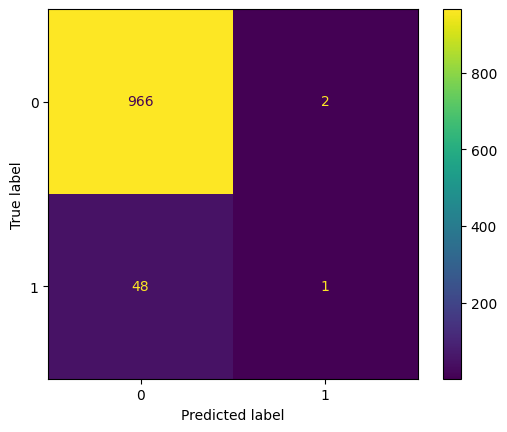

In [328]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_benchmark))
disp.plot()

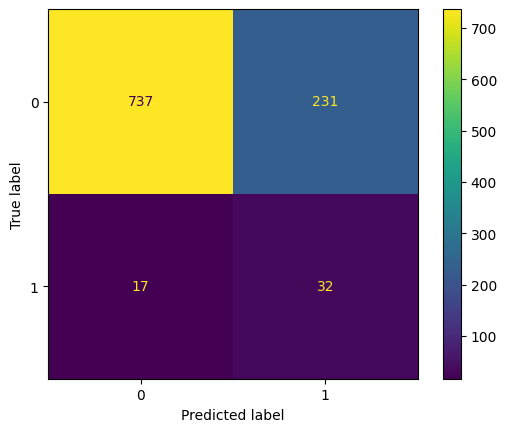

In [329]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_smote))
disp.plot()

## **7. Hyperparameter Tunning**

In [331]:
# define model
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=0)

# hyperparam
hyperparam = {
    'modeling__max_depth' : range(2, 20, 1),
    'modeling__min_samples_split' : range(2, 20, 1),
    'modeling__min_samples_leaf' : range(2, 20, 1),
}

# pipeline
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('resampling', smote),
    ('modeling', model)
])


# gridsearch
gridsearch = GridSearchCV(
    estimator= pipe_prep_model,
    param_grid= hyperparam,
    cv = 5,
    n_jobs = -1,
    scoring= 'recall'
)

# fitting gridsearch ke X_train, y_train
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_iter_simple',
                                                                         Pipeline(steps=[('simple',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['age',
                                                                          'avg_glucose_level',
                                                                          'bmi']),
                                                                        ('pipe_binary',
                                                                         Pipeline(steps=[('simple',
                                                                                          SimpleImputer(fill_value='smokes',
                                                                                                        strategy='const...
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['work_type'])])),
                                       ('resampling',
                                        SMOTE(random_state=0,
                                              sampling_strategy='minority')),
                                       ('modeling',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               max_depth=5,
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'modeling__max_depth': range(2, 20),
                         'modeling__min_samples_leaf': range(2, 20),
                         'modeling__min_samples_split': range(2, 20)},
             scoring='recall')

In [332]:
gridsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_iter_simple',
                                                  Pipeline(steps=[('simple',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('pipe_binary',
                                                  Pipeline(steps=[('simple',
                                                                   SimpleImputer(fill_value='smokes',
                                                                                 strategy='constant')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['smoking_status']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'ever_married',
                                                   'Residence_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['work_type'])])),
                ('resampling',
                 SMOTE(random_state=0, sampling_strategy='minority')),
                ('modeling',
                 DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                        min_samples_leaf=2, random_state=0))])

In [333]:
gridsearch.best_score_

0.8102564102564103

In [334]:
gridsearch.best_params_

{'modeling__max_depth': 2,
 'modeling__min_samples_leaf': 2,
 'modeling__min_samples_split': 2}

## **8. Predict to test set**

Sebelum tuning

In [335]:
# define model
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=0)

# pipeline
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('resampling', smote),
    ('modeling', model)
])

# fit
pipe_prep_model.fit(x_train, y_train)

# Predict
y_pred_smote_before = pipe_prep_model.predict(x_test)

# f1 score
recall_smote = recall_score(y_test, y_pred_smote_before)
recall_smote

0.6530612244897959

In [343]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Setelah Tunning

In [336]:
# define model
model = gridsearch.best_estimator_

# fit
pipe_prep_model.fit(x_train, y_train)

# Predict
y_pred_smote_after = pipe_prep_model.predict(x_test)

# f1 score
recall_smote = recall_score(y_test, y_pred_smote_after)
recall_smote

0.6530612244897959

In [337]:
# confusion metrics sebelum tuning
cm_before = confusion_matrix(y_test, y_pred_smote_before)

In [338]:
# confusion metrics setelajh tuning
cm_after = confusion_matrix(y_test, y_pred_smote_after)

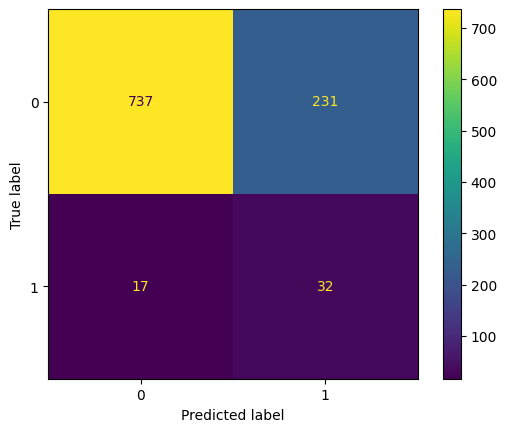

In [339]:
# visualisasi confusion metrics sebelum di tunning 
disp_b = ConfusionMatrixDisplay(confusion_matrix=cm_before)

disp_b.plot()

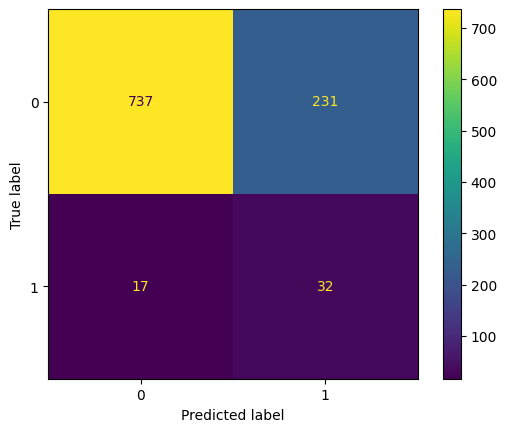

In [344]:
# visualisasi confusion metrics sebelum di tunning 
disp_b = ConfusionMatrixDisplay(confusion_matrix=cm_after)

disp_b.plot()

In [345]:
print(classification_report(y_test, y_pred_smote_after))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       968
           1       0.12      0.65      0.21        49

    accuracy                           0.76      1017
   macro avg       0.55      0.71      0.53      1017
weighted avg       0.94      0.76      0.82      1017



Kesimpulan :
Hasil predect to test set setelah dilakukan parameter tunning sama dengan hasil sebelum dilakukan parameter tunning
akan tetapi model ML dapat menekan / menurunkan nilai FN model benchmarking(no treatment) dan setelaah di lakukan predict ke test set

FN No treatment : 48
FN Setelah predict ke test : 17
